Training and Evaluating Models...

Logistic Regression Results:
Accuracy: 0.9197
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       531
           1       0.93      0.87      0.90       390

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.92       921
weighted avg       0.92      0.92      0.92       921


Random Forest Results:
Accuracy: 0.9555
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       531
           1       0.98      0.92      0.95       390

    accuracy                           0.96       921
   macro avg       0.96      0.95      0.95       921
weighted avg       0.96      0.96      0.96       921


SVM Results:
Accuracy: 0.9349
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       531
           1       0.95      0.89      0.92       390

    accuracy                 

<ipython-input-7-cd6c5e0afb40>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')


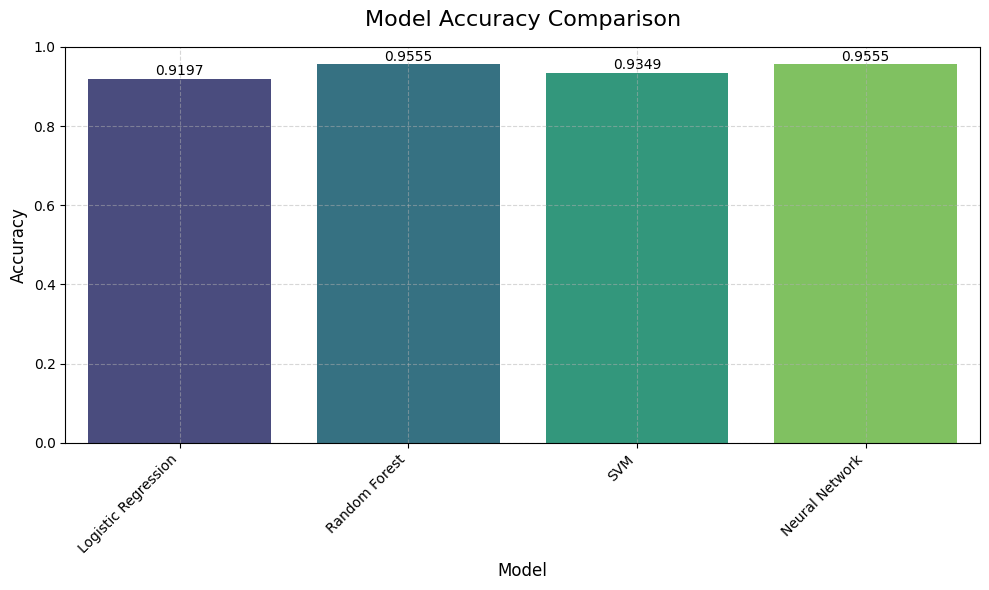


Analyzing Feature Importance with Random Forest...


<ipython-input-7-cd6c5e0afb40>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances[:10], y=sorted_features[:10], palette='Blues_d')


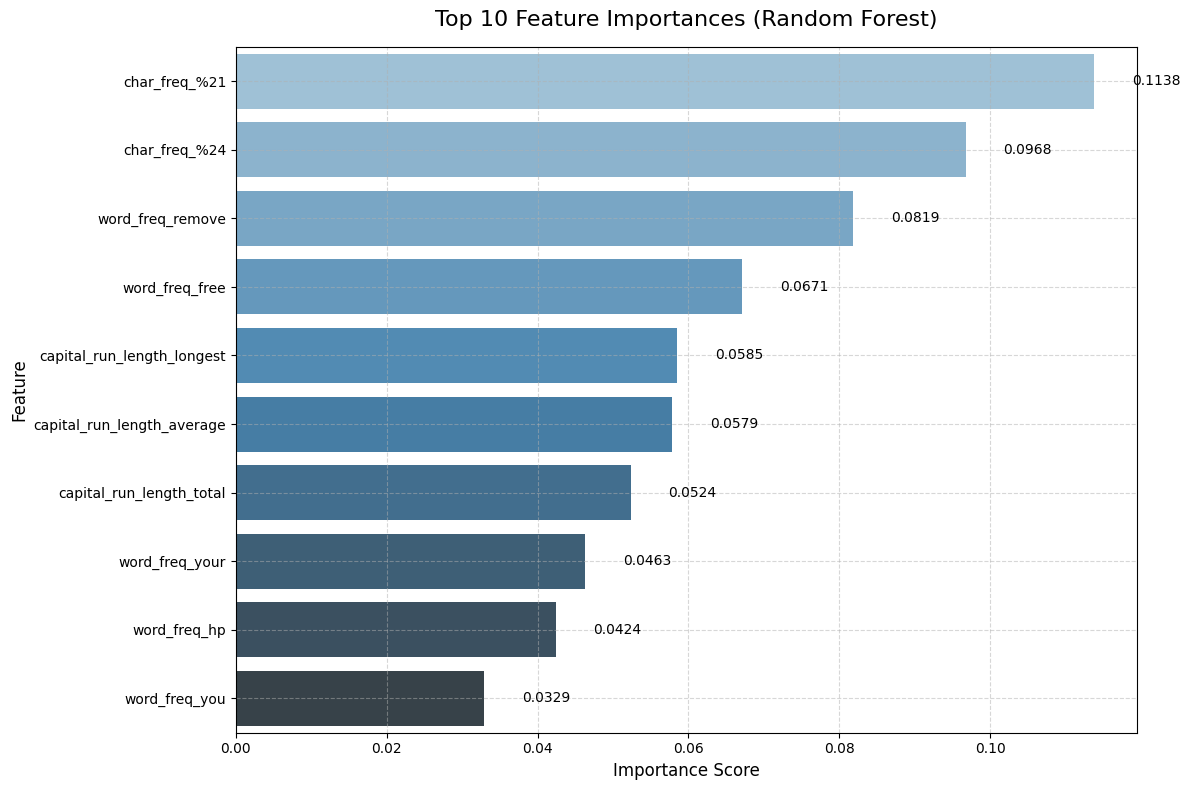


Performing K-Means Clustering with PCA...


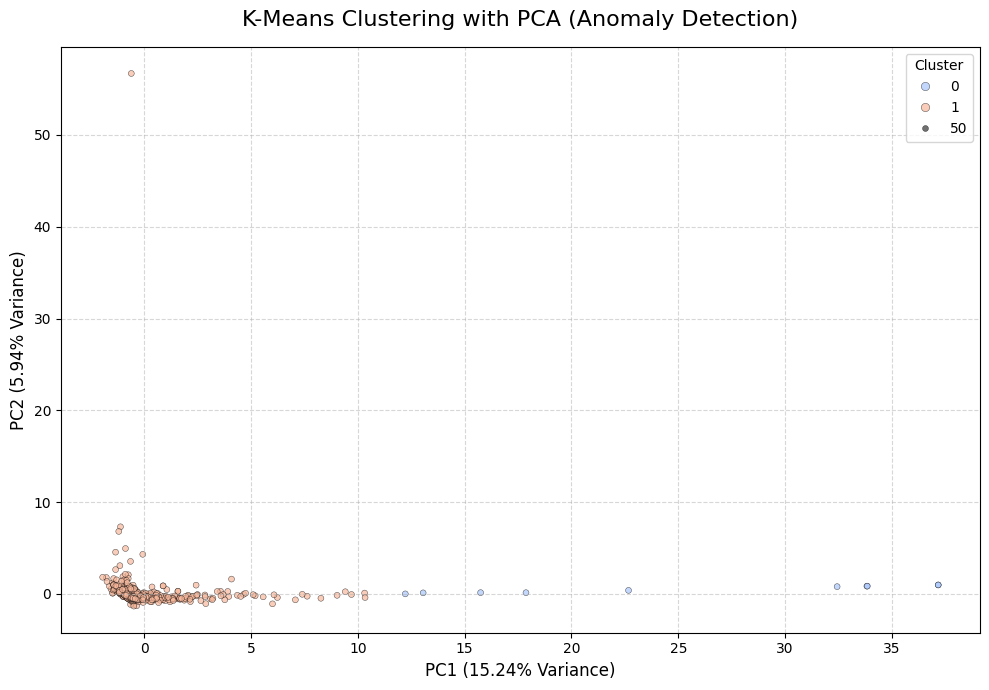


Training Autoencoder for Anomaly Detection...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


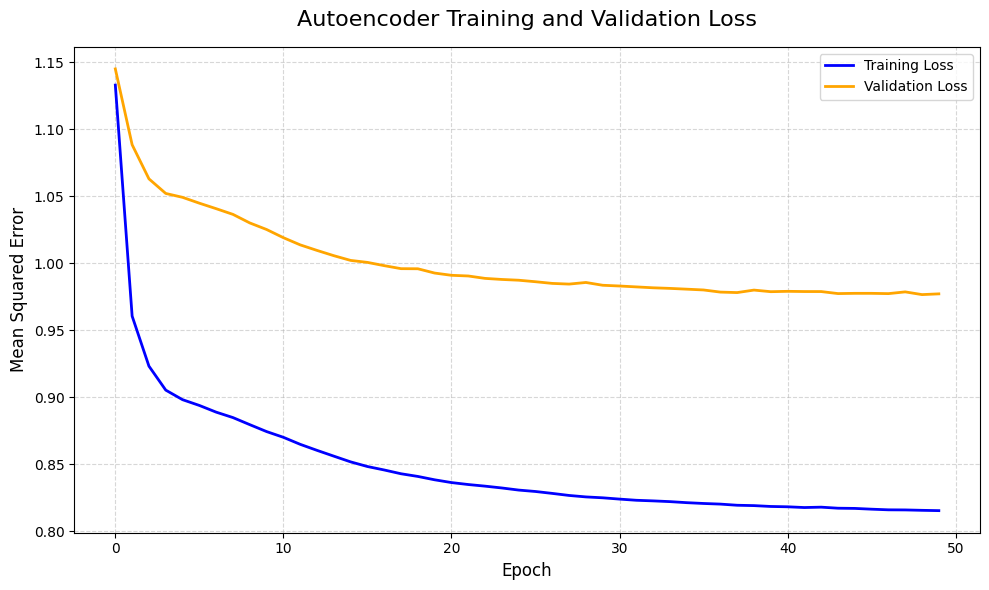

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


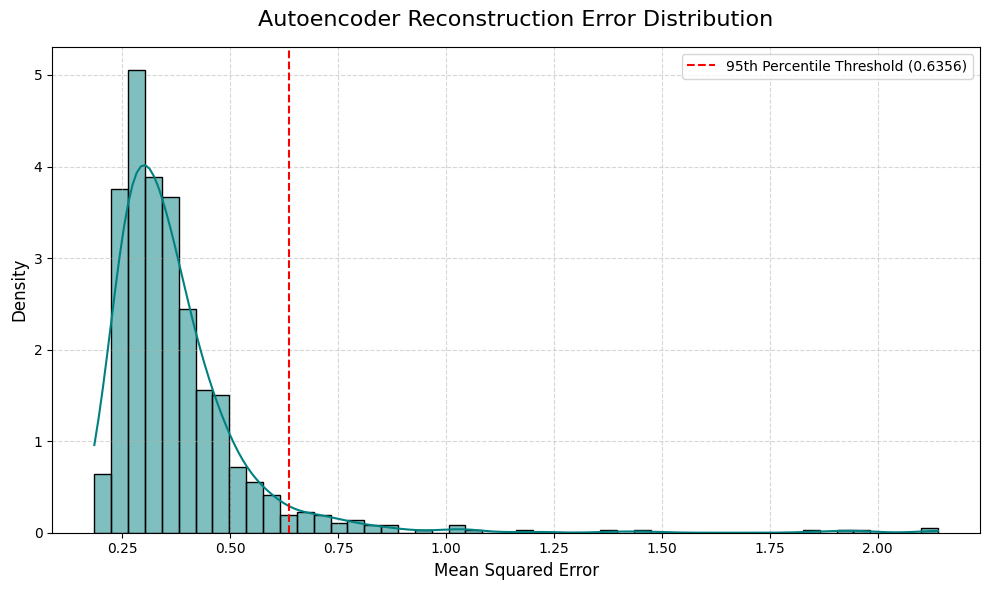

Analysis complete!


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tensorflow import keras
from tensorflow.keras import layers

# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset
try:
    df = pd.read_csv("spambase_csv.csv")
except FileNotFoundError:
    print("Error: 'spambase_csv.csv' not found. Please ensure the file is in the working directory.")
    exit()

# Define features and target
X = df.drop(columns=["class"])
y = df["class"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (for models that need it)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Neural Network": MLPClassifier(max_iter=500, random_state=42)
}
accuracies = {}

print("Training and Evaluating Models...")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracies[name] = accuracy_score(y_test, y_pred)
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracies[name]:.4f}")
    print(classification_report(y_test, y_pred))

# Plot model accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')
plt.title("Model Accuracy Comparison", fontsize=16, pad=15)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(accuracies.values()):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Feature Importance using RandomForest
print("\nAnalyzing Feature Importance with Random Forest...")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # Train on unscaled data
importances = rf.feature_importances_
feature_names = X.columns

# Sort features by importance
indices = np.argsort(importances)[::-1]
sorted_features = feature_names[indices]
sorted_importances = importances[indices]

# Plot top 10 features
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_importances[:10], y=sorted_features[:10], palette='Blues_d')
plt.title("Top 10 Feature Importances (Random Forest)", fontsize=16, pad=15)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
for i, v in enumerate(sorted_importances[:10]):
    plt.text(v + 0.005, i, f"{v:.4f}", va='center', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# K-Means Clustering with PCA
print("\nPerforming K-Means Clustering with PCA...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_scaled)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_scaled)
kmeans_preds = kmeans.predict(X_test_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_preds, palette='coolwarm',
                size=50, alpha=0.7, edgecolor='k')
plt.title("K-Means Clustering with PCA (Anomaly Detection)", fontsize=16, pad=15)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%} Variance)", fontsize=12)
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%} Variance)", fontsize=12)
plt.legend(title="Cluster", loc="best", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Autoencoder for Anomaly Detection
print("\nTraining Autoencoder for Anomaly Detection...")
autoencoder = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(X_train_scaled.shape[1], activation='sigmoid')
])

autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(X_train_scaled, X_train_scaled, epochs=50, batch_size=32,
                          validation_data=(X_test_scaled, X_test_scaled), verbose=0)

# Plot autoencoder training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linewidth=2)
plt.title("Autoencoder Training and Validation Loss", fontsize=16, pad=15)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Mean Squared Error", fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Reconstruction error analysis
reconstructions = autoencoder.predict(X_test_scaled.astype(np.float32))
mse = np.mean(np.abs(reconstructions - X_test_scaled), axis=1)

plt.figure(figsize=(10, 6))
sns.histplot(mse, bins=50, kde=True, color='teal', stat='density')
plt.title("Autoencoder Reconstruction Error Distribution", fontsize=16, pad=15)
plt.xlabel("Mean Squared Error", fontsize=12)
plt.ylabel("Density", fontsize=12)
threshold = np.percentile(mse, 95)
plt.axvline(threshold, color='red', linestyle='--', label=f"95th Percentile Threshold ({threshold:.4f})")
plt.legend(loc='best', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print("Analysis complete!")